# Loan Prediction
#### Building a model to predict if a loan will get approved or not. 
#### Classification problem. 
#### Using Logistic Regression (for now)

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loading the dataset
dataset = pd.read_csv('loans_data.csv')
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#### Dealing with Missing Values

In [2]:
# filling in missing values with mean value of that variable/column
loan_amnt = dataset['LoanAmount']
loan_amnt.fillna(loan_amnt.mean(), inplace=True)

loan_amnt_trm = dataset['Loan_Amount_Term']
loan_amnt_trm.fillna(loan_amnt_trm.mean(), inplace=True)

# drop rows with null values
dataset = dataset.dropna()

#### Converting categorical data to numerical data (Encoding)

In [3]:
# Categorical boolean mask (Series)
categorical_feature_mask = (dataset.dtypes == object)

# filter categorical columns using mask and turn it into a list
categorical_cols = dataset.columns[categorical_feature_mask].tolist()

# import labelencoder
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
dataset[categorical_cols] = dataset[categorical_cols].apply(lambda col: le.fit_transform(col))
dataset

/home/pako/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,506,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,507,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,508,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,509,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


#### Conducting Exploratory Data Analysis (EDA)

(511, 12)

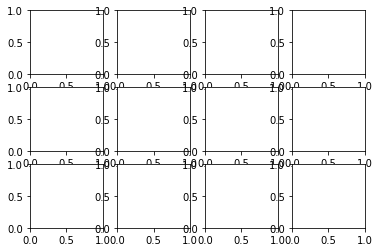

In [14]:
# Splitting data into X (independent variables) and y (dependent variable)
X = dataset.iloc[:, :-1].values
y = dataset['Loan_Status'].values

# Data visualization

# Feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

# creating a grid visualisation of all independent variables
fig, axes = plt.subplots(3,4)
X.shape


In [5]:


# Splitting the data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Fitting Logistic Regression to training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs')
classifier.fit(X_train, y_train)

# Predict Test set results
y_pred = classifier.predict(X_test)
y_pred

# Create the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[16, 25],
       [ 1, 86]])

In [6]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print ("Model accuracy is: ", score)

Model accuracy is:  0.796875
